In [1]:
### importiamo i dati
from pathlib  import Path
data_path = Path('../data/raw')

files = {'grid':'trentino-grid.geojson',
         'adm_reg':'administrative_regions_Trentino.json',
        'weather':'meteotrentino-weather-station-data.json',
        'precip':'precipitation-trentino.csv',
        'precip-avail':'precipitation-trentino-data-availability.csv',
        'SET-1':'SET-nov-2013.csv',
        'SET-2':'SET-dec-2013.csv',
        'SET-lines':'line.csv',
        'twitter':'social-pulse-trentino.geojson'}

In [2]:
import pandas as pd

In [3]:
## importiamo i dati elettrici

#dati elettrici di novembre
elett_nov = pd.read_csv(data_path / files['SET-1'], names = ['LINESET','TIMESTAMP','POWER'] ) 
#dati elettrici di dicembre
elett_dec = pd.read_csv(data_path / files['SET-2'], names = ['LINESET','TIMESTAMP','POWER'] )

#dati elettrici inerenti alla linea
lines = pd.read_csv(data_path / files['SET-lines'])

In [4]:
## importiamo i dati di precipitazioni

# dati precipitazioni
precipitazioni = pd.read_csv(data_path / files['precip'], names = ['TIMESTAMP','CELL_ID', 'INTENSITA'] ) 
precip_avail = pd.read_csv(data_path / files['precip-avail'], names = ['TIMESTAMP', 'AFFIDABILE'] ) 

In [5]:
## importiamo i dati del meteo tutto

import geopandas as gpd
import json
with open(data_path / files['weather']) as f:
    meteo_json = json.load(f)
    
meteo = gpd.GeoDataFrame(meteo_json['features'])

# per costruire una cartina
from shapely.geometry import Point
meteo['geometry'] = meteo['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
meteo.drop(columns=['geomPoint.geom'],inplace=True)

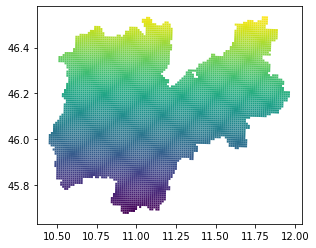

In [6]:
#importo la cartina


grid = gpd.read_file(data_path / files['grid'])

#esempio di plot
grid.plot('cellId')

In [7]:
#importiamo i dati di twitter

import json
with open(data_path / files['twitter']) as f:
    tweets_json = json.load(f)
    
tweets = gpd.GeoDataFrame(tweets_json['features'])

from shapely.geometry import Point
tweets['geometry'] = tweets['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
tweets.drop(columns=['geomPoint.geom'],inplace=True)

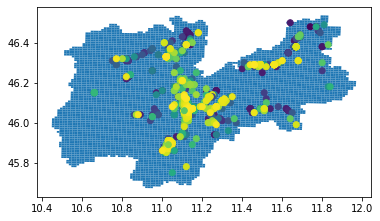

In [8]:
#esempio di plot

date_mask = (tweets['created'] > '2013-11-01') & (tweets['created'] < '2013-11-10')
ax = grid.plot()
tweets[date_mask].plot(column='timestamp',ax=ax)

In [9]:
# importo dati geografici

import json
with open(data_path / files['adm_reg']) as f:
    regioni_json = json.load(f)
    
regioni = gpd.GeoDataFrame(regioni_json['items'])

In [10]:
#salvo i dati nella cartella data/interim così da poterli riprendere ogni qualvolta mi servano

save_path = Path('../data/interim')

grid.to_pickle(save_path/'grid.pkl')
elett_dec.to_pickle(save_path/'elett_dec.pkl')
elett_nov.to_pickle(save_path/'elett_nov.pkl')
lines.to_pickle(save_path/'lines.pkl')
precipitazioni.to_pickle(save_path/'precipitazioni.pkl')
precip_avail.to_pickle(save_path/'precip_avail.pkl')
meteo.to_pickle(save_path/'meteo.pkl')
regioni.to_pickle(save_path/'regioni.pkl')
tweets.to_pickle(save_path/'tweets.pkl')